In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#define constants here (SI units)
h = 6.626e-34 #Planck's constant 
c =2.998e8 #speed of light in vacuum
k = 1.38e-23 #Boltzmann's constant

## Exercise 1
This can be worked out with Taylor series error formulae, but it's nice to visualize the answers 

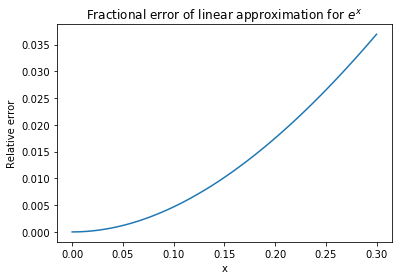

In [12]:
xvals = np.linspace(0, 0.3, num = 100)
plt.figure()
plt.plot(xvals, (np.exp(xvals)-(1+xvals))/np.exp(xvals))
plt.ylabel('Relative error')
plt.xlabel('x')
plt.title('Fractional error of linear approximation for $e^x$')
plt.show()

So we see that when $x\sim0.15$, the relative difference between $e^x$ and $1+x$ starts to grow larger than $1\%$. In terms of the Rayleigh-Jeans approximation, we would then want $\nu< 0.15kT/h$. Keep in mind though, the relative error in the approximation for $B_\nu$ is larger than the relative error in the approximation for $e^{h\nu/kT}$.

For $T = 100$ K, the upper limit is about 300 GHz. 

In [14]:
0.15*k*100/h

312405674615.15247

For $T = 1000$ K, the upper limit is about 3000 GHz (or 3 THz). Note that the Rayleigh-Jeans approximation is often referred to as being the "low-frequency limit" of the Planck Law, but there's a temperature dependence too!

## Exercise 2

In [22]:
def Planck(nu, T):
    return 2*h*nu**3/c**2*1/(np.exp(h*nu/(k*T))-1)

def RJ(nu, T):
    return 2*nu**2*k*T/c**2

In [23]:
#verifying that we are in the Rayleigh-Jeans region for these example values of nu and T
print Planck(1e9, 100.)
print RJ(1e9, 100.)

3.07002250224e-20
3.07075964808e-20


In [15]:
%timeit Planck(1e9, 100.)

The slowest run took 37.90 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.4 µs per loop


In [16]:
%timeit RJ(1e9, 100.)

The slowest run took 25.65 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 316 ns per loop


We see that the Rayleigh-Jeans formulation is an order of magnitude faster to compute than the full Planck law